In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [3]:
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\medical cost regression.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


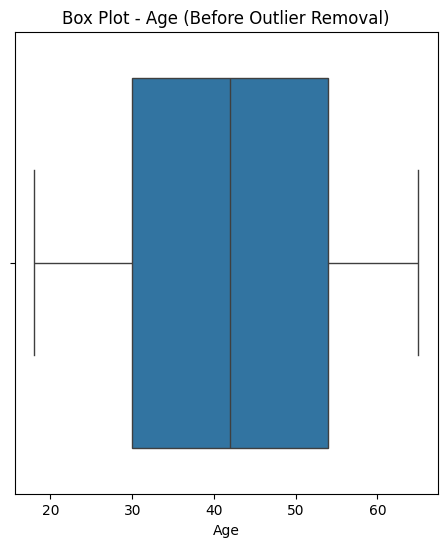

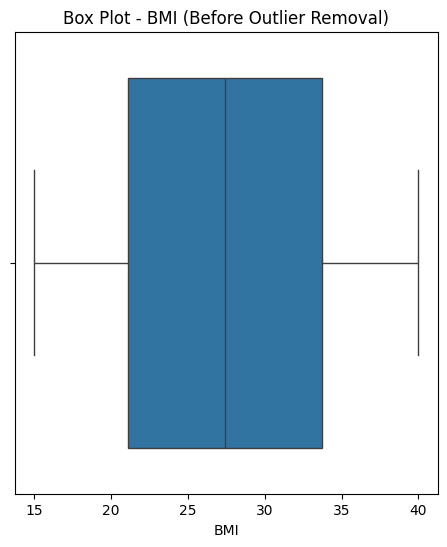

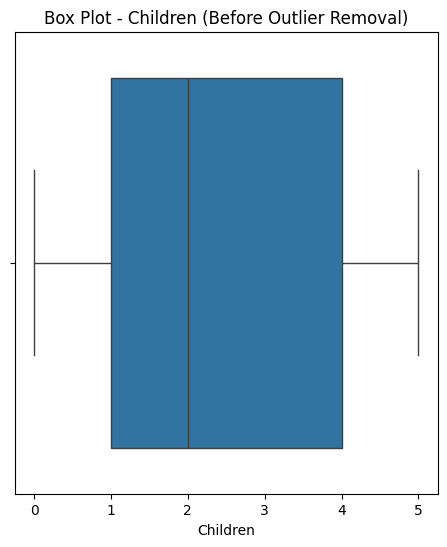

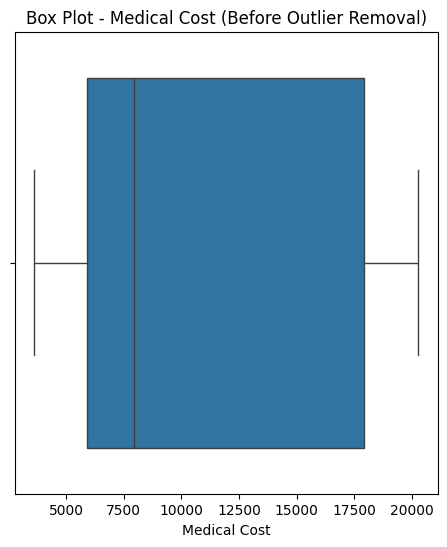

In [15]:
columns_to_check = df.drop(['Region','Sex','Smoker'],axis=1)
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    
    # Box plot before outlier removal
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot - {col} (Before Outlier Removal)')
plt.show()

<Figure size 800x500 with 0 Axes>

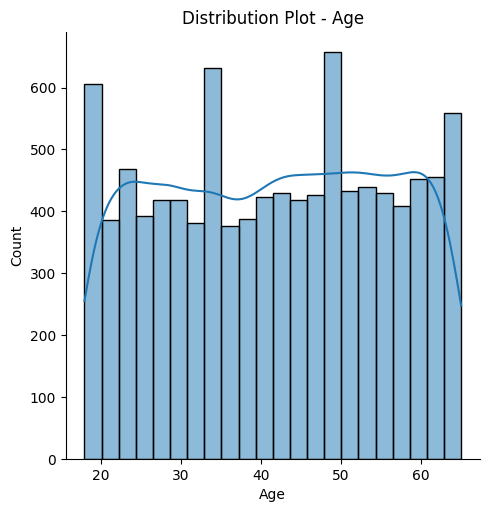

<Figure size 800x500 with 0 Axes>

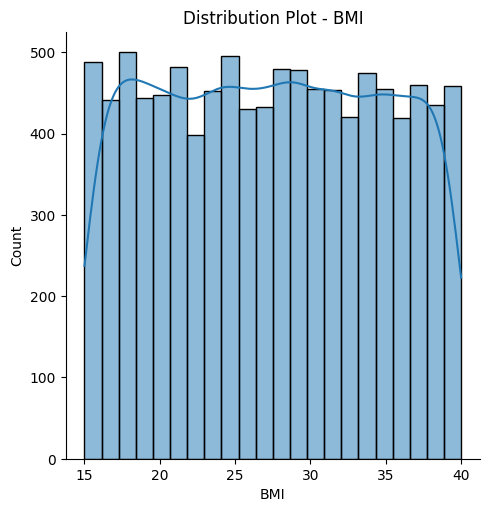

<Figure size 800x500 with 0 Axes>

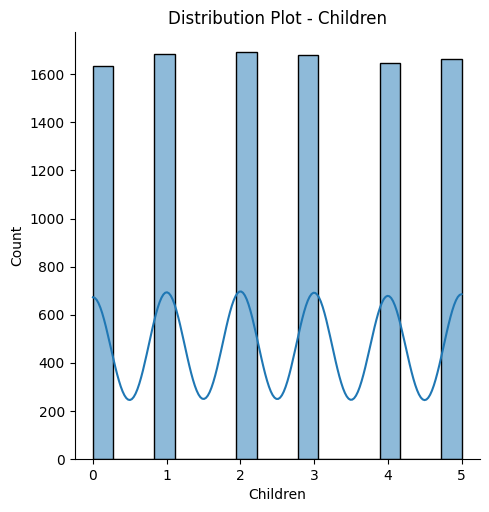

<Figure size 800x500 with 0 Axes>

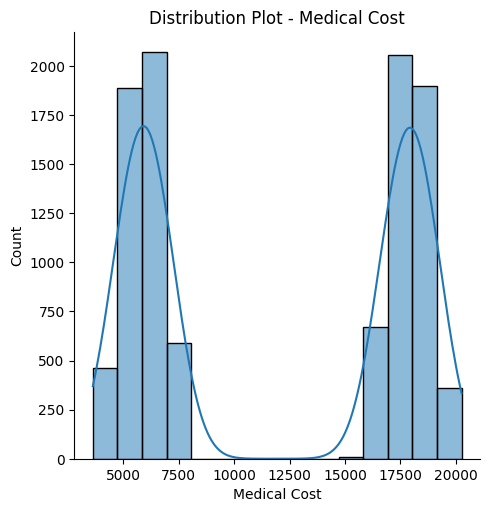

In [16]:
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution Plot - {col}')
    plt.show()

In [17]:
df[df.duplicated()]

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost


In [18]:
df[df.duplicated(keep=False)]

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost


In [6]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OneHotEncoder(), ["Sex", "Smoker", "Region"]),
        ('tnf2', StandardScaler(), ["Age", "BMI", "Children"])
    ],
    remainder="passthrough"
)


In [7]:
X=df.drop("Medical Cost",axis=1)
y=df["Medical Cost"]

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [9]:
X_train_trf=transformer.fit_transform(X_train)
X_test_trf=transformer.transform(X_test)

In [10]:
lr=LinearRegression()
lr.fit(X_train_trf,y_train)
y_pred=lr.predict(X_test_trf)
score=r2_score(y_pred,y_test)
score

0.9977346862809543

In [11]:
# Checking if the model is Overfitting
print("model on test data",np.mean(cross_val_score(lr,X_test_trf,y_test,cv=5,scoring="r2")))
print("model on training data",np.mean(cross_val_score(lr,X_train_trf,y_train,cv=5,scoring="r2")))

model on test data 0.9977156583776544
model on training data 0.9977124577724705


In [33]:
from sklearn.pipeline import Pipeline
import pickle as pkl

In [40]:
pipeline=Pipeline([("transformer",transformer),
                   ("Regression",lr)])

In [41]:
with open("medical Cost prediction.pkl","wb") as file:
    pkl.dump(pipeline,file)